# Benchmark setup and evaluation
If the script doesn't display properly (e.g. curly braces in the markdown) **trust the notebook** in the top right corner and rerender the markdown by running them again.


## Table of contents
1. [Introduction](#section_Introduction)
2. [Config](#section_Config)
3. [Setup and Preliminaries](#section_Setup)
    1. [Ducklietown Shell](#subsection_dts)
    2. [Ducklietown World](#subsection_dw)
    3. [Duckliebot](#subsection_db)
4. [Experiment](#section_Experiment)
5. [Data preparation](#section_Data_prep)
6. [Troubleshooting](#section_Troubleshooting)

<a id="section_Introduction"></a>
## Introduction

<a id="section_Config"></a>
## Config
Please execute the followin code as it contains the configuration of some of the markdown below

In [1]:
image_config = {
    'daffy': {
        'dt-core': 'duckietown/dt-core:daffy@sha256:4c7633c2041f5b7846be2346e0892c9f50987d2fd98d3479ec1a4cf378f52ee6',
        'dt-duckiebot-interface': 'duckietown/dt-duckiebot-interface:daffy@sha256:94a9defa553d1e238566a621e084c4b368e6a9b62053b02f0eef1d5685f9ea73',
        'dt-car-interface': 'duckietown/dt-car-interface:daffy@sha256:e3db984157bf3a2b2d4ab7237536c17b37333711244a3206517daa187c143016',
        'dt-core-amd64': 'duckietown/dt-core:daffy-amd64@sha256:d72e8a8c3191c146ecc2a812bdd036aaf15076e6c1cb9467304e0e54f9a39a10',
        'acquisition-bridge':'duckietown/acquisition-bridge:daffy-arm32v7@sha256:adda9218aa73ba42774aec74e6ec30fcb4b4e0c5545eaa9927c16d4426425f06'
    },
    'master19': {
        'dt-core': 'duckietown/rpi-duckiebot-base:master19@sha256:80f23a1835e6b3f9d2606aae54ce824dd13085e3e7491e87c7f0216797964b5c',
        'dt-duckiebot-interface': 'duckietown/duckiebot-interface:master19@sha256:4a64346a5dcd6dfb05dd45b90ed8aebd33b7eaae0410ef5337576268dd29203f',
        'dt-car-interface': '',
        'dt-core-amd64': 'duckietown/rpi-duckiebot-base:master19-no-arm@sha256:bcefefe0e249b8b1fcde21b3eaa6c7af5737fbf92003854376be9541a97257a2',
        'acquisition-bridge':'duckietown/acquisition-bridge:daffy-arm32v7@sha256:adda9218aa73ba42774aec74e6ec30fcb4b4e0c5545eaa9927c16d4426425f06'
    }
}


Please enter the selected version of the benchmark and the ssid and password of the networks you want to use

In [2]:
benchmark_version = 'master19'
dt_commands_dir = '/home/lujobi/Documents/'
github_username = 'lujobi'
pc_ip = '192.168.1.53'
pc_hostname = 'big-mama'


#please do not modify
if (benchmark_version not in image_config.keys()):
    print (('incorrect input, please set \'benchmark_version\' to {}').format(image_config.keys()))
else:
    img_core = image_config[benchmark_version]['dt-core']
    img_db_if = image_config[benchmark_version]['dt-duckiebot-interface']
    img_car_if = image_config[benchmark_version]['dt-car-interface']
    img_core_ad64 = image_config[benchmark_version]['dt-core-amd64']
    img_acq_bridge = image_config[benchmark_version]['acquisition-bridge']



<a id="section_Setup"></a>
## Setup and Preliminaries

<a id="subsection_dts"></a>
### Duckietown shell
If not installed yet install the newest version of dts (duckietown shell) via the instructions provided by. https://github.com/duckietown/duckietown-shell
Currently we are using a custom stack of the duckietown shell commands, which fix all software to fixed versions to ensure comparability among different hardware configurations. As they are not in the original repo (yet) they have to be cloned from this fork https://github.com/lujobi/duckietown-shell-commands. We are interested in the benchmarking branch. 

#### Installing
Use the following commands in a directory of your choice, recommended `/home/user/Documents/benchmarking`.
``` bash
$ cd {{dt_commands_dir}}
$ git clone git@github.com:lujobi/duckietown-shell-commands.git
$ git checkout benchmark
```
Export the path to the local version of duckietown shell commands
``` bash
$ export DTSHELL_COMMANDS={{dt_commands_dir}}duckietown-shell-commands/
```
Set dts to any version:
``` bash
$ dts --set-version {{benchmark_version}}
```
In order to test whether the installation was successful enter ```$ dts```. The output should look something like:
``` bash
INFO:dts:Commands version: daffy
INFO:dts:Using path '{{dt_commands_dir}}duckietown-shell-commands/' as prescribed by env variable DTSHELL_COMMANDS.
INFO:dts:duckietown-shell-commands 5.0.2
INFO:duckietown-challenges:duckietown-challenges 5.1.5
INFO:zj:zuper-ipce 5.3.0
```
Enable the benchmark command via:
``` bash
$ dts install benchmark
```
Add your dts token via:
``` bash
$ dts tok set
```
#### Explanation benchmark commands
The branch benchmarking fixes all software versions to a specific one in order to ensure reproducibility. Additinally the command group benchmark is added. This is used to specify the version of benchmarking software.

<a id="subsection_dw"></a>
### Duckietown world
#### Tiles
For the first benchmark we need the “normal” 3x3 circle circuit. Please ensure that the tiles are cleaned and assembled to specifications (https://docs.duckietown.org/DT18/opmanual_duckietown/out/dt_ops_appearance_specifications.html). 
Especially make sure that the road has the correct width.

#### Lighting
In order to ensure reproducibility use a well illuminated room. Ensure that the light comes down from top, such that the bots are not dazzled
TODO


#### Watchtowers
For the 3X3 circuit use 4 watchtowers in the middle of the circuit. One per corner. Ensure a proper connection and that the watchtowers are close to the corners. (TODO) 

In [3]:
watchtower_name = 'watchtower01'

##### Setup
As of now we use the standard procedure of setting up a loclization system and setting up the the watchtowers. **Thus make sure to use a new Terminal where the ```$ export DTSHELL_COMMANDS ``` has not been executed.** Detailed instructions can be found at https://docs.duckietown.org/daffy/opmanual_autolab/out/watchtower_initialization.html. All in all use the following command to initialize the sd card:
``` bash
$ dts init_sd_card --hostname {{watchtower_name}} --linux-username mom --linux-password MomWatches --country COUNTRY --type watchtower --experimental
```

##### Calibration
Use the same calibration procedure as for a standard duckiebot. **But only the intrinsic part.** Instructions https://docs.duckietown.org/daffy/opmanual_duckiebot/out/camera_calib.html. 

Starting the camera demo:
``` bash
$ dts duckiebot demo --demo_name camera --duckiebot_name {{watchtower_name}} --package_name pi_camera --image 
duckietown/dt-core:daffy
```
Start the calibration:
``` bash
$ dts duckiebot calibrate_intrinsics {{watchtower_name}}
```
Start collecting data for the calibration. Press on the calibrate button as soon as all bars are green. Click Commit and check under `{{watchtower_name}}.local:8082/data/config/calibrations/camera_intrinsic/` that a file named `{{watchtower_name}}.yaml` exists.

#### World
Use the instructions found at https://docs.duckietown.org/daffy/opmanual_autolab/out/autolab_map_making.html to set up the jupyter notebook in order to generate a new map. Note you will have to create your own fork of the duckietown-world. Make sure to leave the repo name as is!

##### Map
The yaml for a loop with floor around the map and in the center is the following: 

In [4]:
map_name = 'Luzi_loop'

```yaml
tile_size: 0.585
tiles:
- - floor
  - floor
  - floor
  - floor
  - floor
- - floor
  - curve_left/W
  - straight/W
  - curve_left/N
  - floor
- - floor
  - straight/S
  - floor
  - straight/N
  - floor
- - floor
  - curve_left/S
  - straight/E
  - curve_left/E
  - floor
- - floor
  - floor
  - floor
  - floor
  - floor
```
Verify the that the map is displayed in the notebook under the name you gave to the file.

##### Apriltags
We use 4 ground Apriltags placed outside of each corner, moved  in 10 cm from both borders. Use https://docs.duckietown.org/daffy/opmanual_autolab/out/localization_apriltags_specs.html in order to fill the map with april tags. As such use the command. 
``` bash
$ python3 src/apriltag_measure/measure_ground_apriltags.py MAP_NAME
```
Ensure that you enter your measurements **in Meters**. If you go back to the notebook you should see your map now rendered correctly with Apriltags.


In [5]:
watchtower_name = 'watchtower04'

#### Localization
In order to set up the basic localization use the following commands on every watchtower:
``` bash
$ docker -H {{watchtower_name}}.local rm -f dt18_03_roscore_duckiebot-interface_1
```
``` bash
$ docker -H {{watchtower_name}}.local pull duckietown/dt-duckiebot-interface:daffy-arm32v7
```
``` bash
$ docker -H {{watchtower_name}}.local run --name duckiebot-interface --privileged -e ROBOT_TYPE=watchtower --restart unless-stopped -v /data:/data -dit --network=host duckietown/dt-duckiebot-interface:daffy-arm32v7
```
It might be that the last command fails. Use portainer to remove the ```dt-duckiebot-interface```-Container.

Start the acquisition-bridge on all watchtowers:
``` bash
$ docker -H {{watchtower_name}}.local run --name acquisition-bridge --network=host -e ROBOT_TYPE=watchtower -e LAB_ROS_MASTER_IP={{pc_ip}} -dit duckietown/acquisition-bridge:daffy-arm32v7
```


<a id="subsection_db"></a>
### Duckiebot
#### Hardware Setup
Assemble the Duckiebot as prescribed in the manual of the respective version of the Kit.
Ensure that no wires are touching the wheels, or hinder the benchmark in any other way.
Clearly mark the different Duckiebots. Add an Apriltag to your Duckiebot and enter the name below. All in lowercase without whitespaces.

In [8]:
duckiename = 'autobot04'
networks = 'duckietown:quackquack,ure:linden73550,ssid:passwd'

**Ensure that no hardware gets mixed between different configurations. Otherwise the whole benchmark will be invalidated.**

#### Init SD Card
Decide which software version (e.g. master19, daffy, ente) you want to run. Set the benchmark version to said software version using dts:
``` bash
$ dts benchmark set {{benchmark_version}}
```
If the set version should be checked use the following command:
``` bash
$ dts benchmark info
```
Use the init_sd_card command as known. (Some options which could change the software version are disabled) Use said hostname: {{duckiename}}
``` bash
$ dts init_sd_card --hostname {{duckiename}} --country CH --wifi {{networks}}
```
**If you are using a 16GB SD-Card, use the `--compress` flag.**

### Initial Setup
After the `init_sd_card` procedure ist over, take any charged battery (which doesn’t belong to one of the bots to be tested) and plug the Duckiebot in. After some time the bot should be pingable, then ssh-ing into it should be possible. 
#### Portainer and compose
Open [`{{duckiename}}.local:9000`](http://{{duckiename}}.local:9000) in a browser. As soon as portainer is running, there should be 4 containers one of which is not running (`duckietown/rpi-duckiebot-dashboard`), start that one via portainer.
After a short time [`{{duckiename}}.local`]({{duckiename}}.local) should be reachable. Further progress of the installation can be see there after skipping the login. Finished setting up, enter the your duckietown-token.  

#### Verification TODO delete
Use this command to test the setup
```bash
$ dts duckiebot keyboard_control {{duckiename}} --base_image {{img_core_ad64}}
```
and this command to test the camera:
```bash
$ dts start_gui_tools {{duckiename}} --base_image {{img_core_ad64}}
```
then use:
```bash
$ rqt_image_view
```
this should display the live camera feed.


#### Calibration
To calibrate the bot we use the same command as is used in the docs (https://docs.duckietown.org/daffy/opmanual_duckiebot/out/camera_calib.html). 
##### Camera intrinsic

As the `duckiebot-interface` should be already running use the following command: 
``` bash
Daffy
$ dts duckiebot demo --demo_name camera --duckiebot_name {{duckiename}} --package_name pi_camera --image {{img_core}}

Master19
$ dts duckiebot demo --demo_name camera --duckiebot_name {{duckiename}} --image {{img_core}}
```

Then run the calibration using the command:
``` bash
$ dts duckiebot calibrate_intrinsics {{duckiename}} --base_image  {{img_core_ad64}}
```
*info it may take some time untill the image is completely downloaded*

##### Camera extrinsic
Then run the calibration using the command:
``` bash
$ dts duckiebot calibrate_extrinsics {{duckiename}} --base_image  {{img_core_ad64}}
```

#### Wheels
Use thew more detailed explaination here (https://docs.duckietown.org/daffy/opmanual_duckiebot/out/wheel_calibration.html)

Use the `gui_tools` to connect to the ROS: 
```bash
$ dts start_gui_tools {{duckiename}}
```
the use (in a different terminal) the description from the verification paragraph in order to start the keyboard control. 

Then use this command in the `gui_tools` in order to calibrate the bot. Adjust the `TRIM_VALUE` in order to do so. **Make sure the *weels can run freely* and that the bot drives straight within 10 cm on 2m.**
```bash
daffy
$ rosparam set /{{duckiename}}/kinematics_node/trim TRIM_VALUE
master19
$ rosservice call /{{duckiename}}/inverse_kinematics_node/set_trim -- TRIM_VALUE
```


<a id="section_Experiment"></a>
## Experiment

### Preliminaries

### Starting the lane following demo
Use the following commands in the same order to set up the lane following.

**daffy**
``` bash
$ dts duckiebot demo --demo_name all_drivers --duckiebot_name {{duckiename}} --package_name duckiebot_interface --image {{img_db_if}}
```

```bash
$ dts duckiebot demo --demo_name all --duckiebot_name {{duckiename}} --package_name car_interface --image {{img_car_if}}
```


```bash
$ dts duckiebot demo --demo_name lane_following --duckiebot_name {{duckiename}} --package_name duckietown_demos --image {{img_core}}
```
**master19**

```bash
$ dts duckiebot demo --demo_name lane_following --duckiebot_name {{duckiename}} --package_name duckietown_demos
```

#### Start the acquisition
first remove all containers which don't belong to a stack, and the lane_following ones. then run `sudo docker image prune`

```bash
$ docker -H {{duckiename}}.local run --name acquisition-bridge --network=host -v /data:/data -e LAB_ROS_MASTER_IP={{pc_ip}} -dit {{img_acq_bridge}}
```
```bash
$ dts start_gui_tools {{pc_hostname}}
$ rqt_image_view
```
If the ros-master is missing use the #Todo# Command in order to restart the ros master

exit and run:
```bash
$ docker run -it -e VEHICLE_NAME={{pc_hostname}}  -e VEHICLE_IP={{pc_ip}} --rm -v /home/lujobi/data:/data duckietown/dt-ros-commons:daffy-amd64 /bin/bash
```

#### Start the demo
start the keyboard
```bash
$ dts duckiebot keyboard_control {{duckiename}} --base_image {{img_core_ad64}}
```

More commands 
```bash
$ dts duckiebot demo --demo_name base --duckiebot_name autobot14
$ rosbag record -a -O /data/{{bag_name}}
$ scp duckie@autobot14.local:/data/mater19_first_bm.bag /home/lujobi/data
$ dts devel build -f --arch amd64
$ docker run -v /home/lujobi/data/:/data -e BAGNAME=mater19_first_bm.bag -it --rm duckietown/analyze-rosbag:v1-amd64
```

### Data Collection

In [7]:
bag_name = 'mater19_first_bm_test2'
bm_group = 'test'
bm_subgroup = 'new'
bm_duration = 120
bm_buffer = 0

Press a in order to start the auto lanefollowing after the first round start the data collection
```bash
$ rosbag record -a -O /data/{{bag_name}}
```
then start the diagnostics
```bash
$ dts diagnostics run -G {{bm_group}} -S {{bm_subgroup}} -d {{bm_duration}} -H {{duckiename}}.local --type duckiebot
```
after the diagnostics have finished stop the recording from with Ctrl+C, then stop the lane following.


<a id="section_Data_prep"></a>
## Data preparation

```bash
$ docker run --name post_processor -dit --rm -e INPUT_BAG_PATH=/data/{{bag_name}} -e OUTPUT_BAG_PATH=/data/processed_{{bag_name}}.bag -e ROS_MASTER_URI=http://{{pc_ip}}:11311 -v /home/lujobi/data:/data duckietown/post-processor:daffy-amd64
```
```bash
$ docker run --rm  -e  ATMSGS_BAG=/data/processed_{{bag_name}} -e OUTPUT_DIR=/data -e ROS_MASTER={{pc_hostname}} -e ROS_MASTER_IP={{pc_ip}} --name graph_optimizer -v /home/lujobi/data:/data -e DUCKIETOWN_WORLD_FORK={{github_username}} -e MAP_NAME={{map_name}} duckietown/cslam-graphoptimizer:daffy-amd64
```

### Diagnostics
Go to https://dashboard.duckietown.org/diagnostics and download the respective file then upload it here

In [1]:
from ipywidgets import FileUpload

upload_diagnostics = FileUpload(accept='.json', multiple=False)
upload_diagnostics

FileUpload(value={}, accept='.json', description='Upload')

In [2]:
from ipywidgets import FileUpload

upload_latency = FileUpload(accept='.json', multiple=False)
upload_latency

FileUpload(value={}, accept='.json', description='Upload')

In [84]:
%matplotlib notebook

from IPython.core.display import HTML
from functools import reduce
import operator
import json
import base64
import matplotlib.pyplot as plt
import numpy as np
from scipy  import interpolate

def retrieve_from_extern(data, keys, format, t0, calc=None): 
    """ helper function retrieving one measurement,
            doing formatting and calculating
    """ 
    k = keys[0]
    res = []
    time = []
    for i, meas in enumerate(data[k]):
        formatted = float(meas if not format else format(meas))
        sol = [calc(formatted)] if calc else [formatted]
        res.append(sol[0])
        time.append(data['time'][i]-t0)
    return time, res

def retrieve_from_keys(data, group, keys, format, calc=None): 
    """ helper function retrieving one measurement,
            doing formatting and calculating
    """ 
    res = np.zeros(len(data[group]))
    for i, meas in enumerate(data[group]):
        local_res = []
        for key in keys:
            reduced = reduce(operator.getitem, key.split('.'), meas)
            local_res.append(float(reduced if not format else format(reduced)))
        sol = [calc(*local_res)] if calc else local_res
        res[i] = sol[0]
    return res

def retrieve_from_containers(data, group, container, keys, format, t0, calc=None): 
    """ helper function retrieving one measurement,
            doing formatting and calculating
    """
    res =  []
    time = []
    container_id = ''
    
    for key, cont in data['containers'].items():
        if (cont == container):
            container_id = key
            break
            
    key = 'process_stats' if group == 'process' else 'container_stats'
    
    for meas in data[key]:
        if (meas['container'] == container_id):
            local_res = []
            for key in keys:
                reduced = reduce(operator.getitem, key.split('.'), meas)
                local_res.append(float(reduced if not format else format(reduced)))
            sol = [calc(*local_res)] if calc else local_res
            
            t = meas['time'] - t0
            if t in time:
                i = time.index(t)
                res[i] += sol[0]
            else:
                res.append(sol[0])
                time.append(meas['time'] - t0)
    return time, res

def collect_data(data, meas, t): 
    """ returns meas-dict extended with measurements from the data (json)
            interpolates between the data, 
            as well as doing statisical analysis
    """
    search_key = list(meas.keys())
    search_key.remove('container')
    search_key.remove('process')
    
    t0 = data['general']['time'] 
    i = 0
    for group_key, group_items in meas.items():
        for index, item in enumerate(group_items):
            i+=1
            if (group_key == 'container' or group_key == 'process'):
                #print("1st if")
                converted_keys = list(map(lambda x: x.split('.', 1)[1],  item.get('keys')))
                t_meas, y = retrieve_from_containers(data,
                                                    group_key,
                                                    item.get('keys')[0].split('.', 1)[0], 
                                                    converted_keys, 
                                                    item.get('format'), 
                                                    t0 if not item.get('t0') else item.get('t0'),
                                                    item.get('calc'))
            elif group_key == 'extern':
                #print("2st if")
                t_meas, y = retrieve_from_extern(item.get('data'),
                                                    item.get('keys'),  
                                                    item.get('format'), 
                                                    t0 if not item.get('t0') else item.get('t0'),
                                                    item.get('calc'))
            else:  
                #print("3st if")
                t_meas = retrieve_from_keys(data, group_key, ['time'], lambda t: t - t0)
                y = retrieve_from_keys(data, group_key, item.get('keys'), 
                                       item.get('format'), item.get('calc'))
            
            if len(t_meas) > 1:
                if not meas[group_key][index].get('ip'):
                    cs = interpolate.CubicSpline(t_meas, y) #set up cubic spline interpolation
                    y_ip = np.round(cs(t), decimals=2)
                else:
                    ip = meas[group_key][index]['ip'](t_meas, y)
                    y_ip = np.round(ip(t), decimals=2)
            else:
                y_ip = y * len(t)
            
            if i ==12:
                return meas
            if y!= []:         
                meas[group_key][index]['t'] = t_meas
                meas[group_key][index]['measurement'] = y
                meas[group_key][index]['measurement_ip'] = y_ip
                meas[group_key][index]['info'] = meas[group_key][index].get('info') if meas[group_key][index].get('info') else ""
                meas[group_key][index]['info'] += "!! time not synced !!" if item.get('t0') else ""
                meas[group_key][index]['min'] = np.min(y)
                #print(type(np.mean(y, dtype=np.float64)))
                meas[group_key][index]['max'] = np.max(y)
                meas[group_key][index]['mean'] = np.mean(y, dtype=np.float64)
                meas[group_key][index]['median'] = np.median(y)
                meas[group_key][index]['std'] = np.std(y, dtype=np.float64)
            else:  
                meas[group_key][index]['t'] = t_meas
                meas[group_key][index]['measurement'] = y
                meas[group_key][index]['measurement_ip'] = y_ip
                meas[group_key][index]['info'] = meas[group_key][index].get('info') if meas[group_key][index].get('info') else ""
                meas[group_key][index]['info'] += "!! time not synced !!" if item.get('t0') else ""
                meas[group_key][index]['min'] = np.float64(0)
                meas[group_key][index]['max'] = np.float64(0)
                meas[group_key][index]['mean'] = np.float64(0)
                meas[group_key][index]['median'] = np.float64(0)
                meas[group_key][index]['std'] = np.float64(0)
    return meas

def collect_meta(data, meta):
    """collect metadata"""
    res = {'bm_type': 'nothin to see here'}
    for key, item in meta.items():
        res[key] = reduce(operator.getitem, item.split('.'), data)
    return res
    
def display_data(meas, t):
    """ displays the measured data in the plot"""  
    nr_of_meas = 12#sum(map(lambda k: len(meas[k]), meas.keys()))
    print(nr_of_meas)
    fig, axes= plt.subplots(nr_of_meas, 1, figsize=(7, nr_of_meas*3))
    ax_ind = 0
    i=0
    for group_key, group_items in meas.items():
        for item in group_items:
            i+=1
            print(i)
            if i ==12:
                fig.tight_layout(pad=3.0)
                plt.show()
                return
#             mean_name = ('mean {:2.2f}{unit}, median {:2.2f}{unit}, std: {:2.2f}{unit}'
#                         ).format(item['mean'], item['median'], item['std'], unit=item['unit'])
            ylabel = ('{} [{}]').format(item['ylabel'], item['unit'])
            
            t_meas = item['t']
            t_ind_min = (np.abs(t - t_meas[0])).argmin()
            t_ind_max = (np.abs(t - t_meas[-1])).argmin()
            
            axes[ax_ind].plot(t_meas, item['measurement'], 'o', 
                              t[t_ind_min:t_ind_max], item['measurement_ip'][t_ind_min:t_ind_max],
                              t, [item['mean']]*len(t), 
                              t, [item['min']]*len(t), ':' ,
                              t, [item['max']]*len(t), ':' )
#             axes[ax_ind].legend(['measured', 'interpolated', mean_name])
            axes[ax_ind].set_title(item['name'] + " " + item['info'])
            axes[ax_ind].set_ylabel(ylabel)
            axes[ax_ind].set_ylim(item.get('ylim'))
            
            ax_ind += 1
    #fig.suptitle('Diagnostics', fontsize=16)
    fig.tight_layout(pad=3.0)
    plt.show()


In [90]:
class NumpyArrayEncoder(json.JSONEncoder):
    """treats turns np.arrays in normal arrays for json export"""
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)
    
def export_measurements_json(meas, meta, t):
    """exports measurements as json string"""
    res = {'time' : t}
    i = 0
    for group_key, group_items in meas.items():
        for item in group_items:
            i+=1
            if i ==12:
                assembled = {'meta': meta, 'data': res}
                return json.dumps(assembled, cls=NumpyArrayEncoder)
            res[item['export_name']] = item['measurement_ip']
    assembled = {'meta': meta, 'data': res}
    return json.dumps(assembled, cls=NumpyArrayEncoder)

def export_json(meas, meta, t):
    """exports measurements as json string"""
    res = {'time' : t}
    for group_key, group_items in meas.items():
        for item in group_items:
            current = {}
            for key, value in item.items():
                if not callable(value) and not key == 'data':
                    current[key] = value
            
            res[item['export_name']] = current
    assembled = {'meta': meta, 'measurements': res}
    return json.dumps(assembled, cls=NumpyArrayEncoder)

def json2b64(js):
    return str(base64.urlsafe_b64encode(js.encode()))

def b64DownloadButton(filename, text, b64_data, rem):
    return HTML(("""<a target="_blank" 
            download='{}' 
            href='data:text/json;charset=utf-8;base64,{}'>
            {}
        </a>""").format(filename, b64_data[2:-rem], text))

In [91]:
assert upload_diagnostics.data and upload_latency.data, 'File missing, please upload in above cell'
data = json.loads(upload_diagnostics.data[0].decode('utf-8'))
data_name = list(upload_diagnostics.value.keys())[0]
data_latency = json.loads(upload_latency.data[0].decode('utf-8'))

measurements = {
    'diagnostics': {
        'resources_stats': [
            {
                'name': 'Memory in Percent',
                'ylabel': 'RAM',
                'ylim': (0, 100),
                'keys': ['memory.used', 'memory.total'],
                'calc': lambda x, y: 100*x/y,
                'export_name': 'ram_p',
                'unit': '%',
                
            },
            {
                'name': 'Swap in Percent',
                'ylabel': 'Swap',
                'ylim': (0, 100),
                'keys': ['swap.used', 'swap.total'],
                'calc': lambda x, y: 100*x/y,
                'export_name': 'swap_p',
                'unit': '%',
            },
            {
                'name': 'CPU Percent',
                'ylabel': 'CPU',
                'ylim': (0, 100),
                'keys': ['cpu.pcpu'],
                'export_name': 'cpu_p',
                'unit': '%',
            },
        ],
        'health':[
            {
                'name': 'Status',
                'ylabel': 'Status [ok, warn, error]',
                'ylim': (0, 2),
                'format': lambda x: 2 if x == 'error' else 1 if x == 'warning' else 0,
                'keys': ['status'],
                'export_name': 'status_tribool',
                'unit': ' ',
                'ip': lambda x, y: interpolate.interp1d(x, y, bounds_error=False)
            },
            {
                'name': 'CPU Temperature',
                'ylabel': 'CPU',
                'ylim': (0, 120),
                'format': lambda i: i[0:-2],
                'keys': ['temp'],
                'export_name': 'cpu_temp_c',
                'unit': '°C',
            },
            {
                'name': 'Core Voltage',
                'ylabel': 'Core',
                'ylim': (0, 1.5),
                'format': lambda i: i[0:-1],
                'keys': ['volts.core'],
                'export_name': 'cpu_core_v',
                'unit': 'V',
            },
            {
                'name': 'Throttling',
                'ylabel': 'Throttling [yes/no]',
                'ylim': (0, 1),
                'format': lambda x: 1 if x else 0,
                'keys': ['throttled_humans.throttling-now'],
                'export_name': 'throttling_bool',
                'unit': ' ',
                'ip': lambda x, y: interpolate.interp1d(x, y, bounds_error=False)
            },
            {
                'name': 'Core Clock',
                'ylabel': 'Core',
                'ylim': (0, 600),
                'calc': lambda x: x/1000000,
                'keys': ['clock.core'],
                'export_name': 'cpu_core_clock',
                'unit': 'MHz',
            },
            {
                'name': 'ARM Clock',
                'ylabel': 'ARM',
                'ylim': (0, 2000),
                'calc': lambda x: x/1000000,
                'keys': ['clock.arm'],
                'export_name': 'cpu_arm_clock',
                'unit': '?',
            },
        ],
        'process':[
            {
                'name': 'Portainer Threads',
                'ylabel': 'Threads',
                'keys': ['portainer.nthreads'],
                'export_name': 'portainer_threads',
                'unit': '#',
            },
            {
                'name': 'Watchtower Threads',
                'ylabel': 'Threads',
                'keys': ['watchtower.nthreads'],
                'export_name': 'watchtower_threads',
                'unit': '#',
            },
            {
                'name': 'Duckiebot-dashboard Threads',
                'ylabel': 'Threads',
                'keys': ['duckiebot-dashboard.nthreads'],
                'export_name': 'db_dashboard_threads',
                'unit': '#',
            },
            {
                'name': 'Device-online Threads',
                'ylabel': 'Threads',
                'keys': ['device-online.nthreads'],
                'export_name': 'device_online_threads',
                'unit': '#',
            },
            {
                'name': 'Health Threads',
                'ylabel': 'Threads',
                'keys': ['health.nthreads'],
                'export_name': 'health_threads',
                'unit': '#',
            },
            {
                'name': 'Simple-server Threads',
                'ylabel': 'Threads',
                'keys': ['simple-server.nthreads'],
                'export_name': 'simple_server_threads',
                'unit': '#',
            },
            {
                'name': 'Rosbridge-websocket Threads',
                'ylabel': 'Threads',
                'keys': ['rosbridge-websocket.nthreads'],
                'export_name': 'rosbridge_websocket_threads',
                'unit': '#',
            },
            {
                'name': 'Demo_all_drivers Threads',
                'ylabel': 'Threads',
                'keys': ['demo_all_drivers.nthreads'],
                'export_name': 'demo_all_drivers_threads',
                'unit': '#',
            },
            {
                'name': 'Demo_all Threads',
                'ylabel': 'Threads',
                'keys': ['demo_all.nthreads'],
                'export_name': 'demo_all_threads',
                'unit': '#',
            },
            {
                'name': 'Demo_lane_following Threads',
                'ylabel': 'Threads',
                'keys': ['demo_lane_following.nthreads'],
                'export_name': 'demo_lane_following_threads',
                'unit': '#',
            },
            {
                'name': 'Acquisition-bridge Threads',
                'ylabel': 'Threads',
                'keys': ['acquisition-bridge.nthreads'],
                'export_name': 'acquisition_bridge_threads',
                'unit': '#',
            },
            # Useless as the Process is run on host PC
            #{
            #    'name': 'Dts-run-diagnostics-system-monitor Threads',
            #    'ylabel': 'Threads',
            #    'ylim': (0, 15),
            #    'keys': ['dts-run-diagnostics-system-monitor.nthreads'],
            #   'export_name': 'dts_run_diagnostics_system_monitor_threads',
            #    'unit': '#',
            #},
        ],
        'container':[
            {
                'name': 'Portainer CPU in Percent',
                'ylabel': 'CPU',
                'keys': ['portainer.pcpu'],
                'export_name': 'portainer_pcpu',
                'unit': '%',
            },
            {
                'name': 'Watchtower CPU in Percent',
                'ylabel': 'CPU',
                'keys': ['watchtower.pcpu'],
                'export_name': 'watchtower_pcpu',
                'unit': '%',
            },
            {
                'name': 'Duckiebot-dashboard CPU in Percent',
                'ylabel': 'CPU',
                'keys': ['duckiebot-dashboard.pcpu'],
                'export_name': 'db_dashboard_pcpu',
                'unit': '%',
            },
            {
                'name': 'Device-online CPU in Percent',
                'ylabel': 'CPU',
                'keys': ['device-online.pcpu'],
                'export_name': 'device_online_pcpu',
                'unit': '%',
            },
            {
                'name': 'Health CPU in Percent',
                'ylabel': 'CPU',
                'keys': ['health.pcpu'],
                'export_name': 'health_pcpu',
                'unit': '%',
            },
            {
                'name': 'Simple-server CPU in Percent',
                'ylabel': 'CPU',
                'keys': ['simple-server.pcpu'],
                'export_name': 'simple_server_pcpu',
                'unit': '%',
            },
            {
                'name': 'Rosbridge-websocket CPU in Percent',
                'ylabel': 'CPU',
                'keys': ['rosbridge-websocket.pcpu'],
                'export_name': 'rosbridge_websocket_pcpu',
                'unit': '%',
            },
            {
                'name': 'Demo_all_drivers CPU in Percent',
                'ylabel': 'CPU',
                'keys': ['demo_all_drivers.pcpu'],
                'export_name': 'demo_all_drivers_pcpu',
                'unit': '%',
            },
            {
                'name': 'Demo_all CPU in Percent',
                'ylabel': 'CPU',
                'keys': ['demo_all.pcpu'],
                'export_name': 'demo_all_pcpu',
                'unit': '%',
            },
            {
                'name': 'Demo_lane_following CPU in Percent',
                'ylabel': 'CPU',
                'keys': ['demo_lane_following.pcpu'],
                'export_name': 'demo_lane_following_pcpu',
                'unit': '%',
            },
            {
                'name': 'Acquisition-bridge CPU in Percent',
                'ylabel': 'CPU',
                'keys': ['acquisition-bridge.pcpu'],
                'export_name': 'acquisition_bridge_pcpu',
                'unit': '%',
            },
            {
                'name': 'Dts-run-diagnostics-system-monitor CPU in Percent',
                'ylabel': 'CPU',
                'keys': ['dts-run-diagnostics-system-monitor.pcpu'],
                'export_name': 'dts_run_diagnostics_system_monitor_pcpu',
                'unit': '%',
            },
        ],
        'extern':[
            {
                'name': 'Lane detector node latency',
                'data': data_latency,
                'ylabel': 'Latency',
                'ylim': (0, 1000),
                't0': min(data_latency.get('time')),
                'keys': ['meas'],
                'export_name': 'ldn_latency',
                'unit': 'ms',
                'ip': lambda x, y: interpolate.interp1d(x, y, bounds_error=False)
            },
        ]
    }
}

meta = {
    'time': 'general.time_iso',
    'target': 'general.target',
    'duration':'general.duration',
    'cores': 'endpoint.NCPU',
    'mem': 'endpoint.MemTotal',
}

12


/home/linuslingg/duckietown-world/duckietown-world-venv/lib/python3.6/site-packages/ipykernel_launcher.py:121: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


<IPython.core.display.Javascript object>


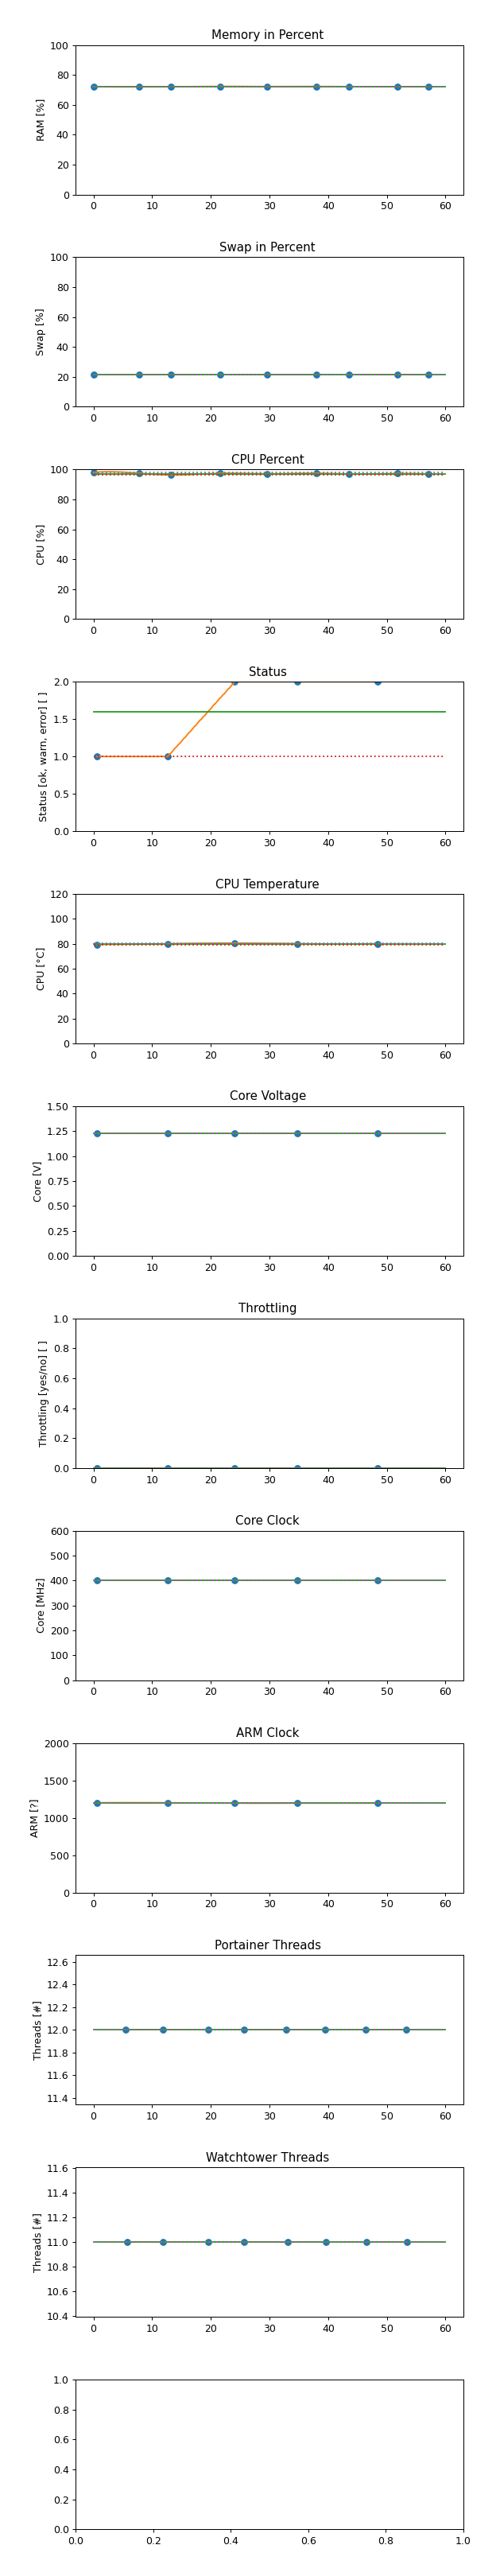

1
2
3
4
5
6
7
8
9
10
11
12


In [92]:
%matplotlib notebook

t = np.round(np.linspace(0, data['general']['duration'] - 0, 200), decimals=2)
#print(measurements['diagnostics'])
measurements_collected = collect_data(data, measurements['diagnostics'], t)
meta_collected = collect_meta(data, meta)
display_data(measurements_collected, t)

In [93]:
b64_simple = json2b64(export_measurements_json(measurements_collected, meta_collected, t)) 
b64DownloadButton("prep_" + data_name, "Download simple", b64_simple, 2)
#print(b64_simple)

In [70]:
print(t)

[  0.     0.6    1.21   1.81   2.41   3.02   3.62   4.22   4.82   5.43
   6.03   6.63   7.24   7.84   8.44   9.05   9.65  10.25  10.85  11.46
  12.06  12.66  13.27  13.87  14.47  15.08  15.68  16.28  16.88  17.49
  18.09  18.69  19.3   19.9   20.5   21.11  21.71  22.31  22.91  23.52
  24.12  24.72  25.33  25.93  26.53  27.14  27.74  28.34  28.94  29.55
  30.15  30.75  31.36  31.96  32.56  33.17  33.77  34.37  34.97  35.58
  36.18  36.78  37.39  37.99  38.59  39.2   39.8   40.4   41.01  41.61
  42.21  42.81  43.42  44.02  44.62  45.23  45.83  46.43  47.04  47.64
  48.24  48.84  49.45  50.05  50.65  51.26  51.86  52.46  53.07  53.67
  54.27  54.87  55.48  56.08  56.68  57.29  57.89  58.49  59.1   59.7
  60.3   60.9   61.51  62.11  62.71  63.32  63.92  64.52  65.13  65.73
  66.33  66.93  67.54  68.14  68.74  69.35  69.95  70.55  71.16  71.76
  72.36  72.96  73.57  74.17  74.77  75.38  75.98  76.58  77.19  77.79
  78.39  78.99  79.6   80.2   80.8   81.41  82.01  82.61  83.22  83.82
  84.42

In [33]:
b64_complete = json2b64(export_json(measurements_collected, meta_collected, t))
b64DownloadButton("prep_complete_" + data_name, "Download complete", b64_complete, 3)
# print(b64_complete)

<a id="section_Troubleshooting"></a>
## Troubleshooting
### Init_sd_card
Should an error like the one below appear: 
``` bash
subprocess.CalledProcessError: Command '['sudo', 'e2fsck', '-f', '/dev/sdb2']' returned non-zero exit status 8.
```
use ```$ sudo fdisk /dev/device``` to delete all partitions on the device. (d to delete, w to write)

### Render Apriltags
If your map is rendered really tiny. You probably entered the measurements of the april tags in another unit than meters. 
